In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis, chi2

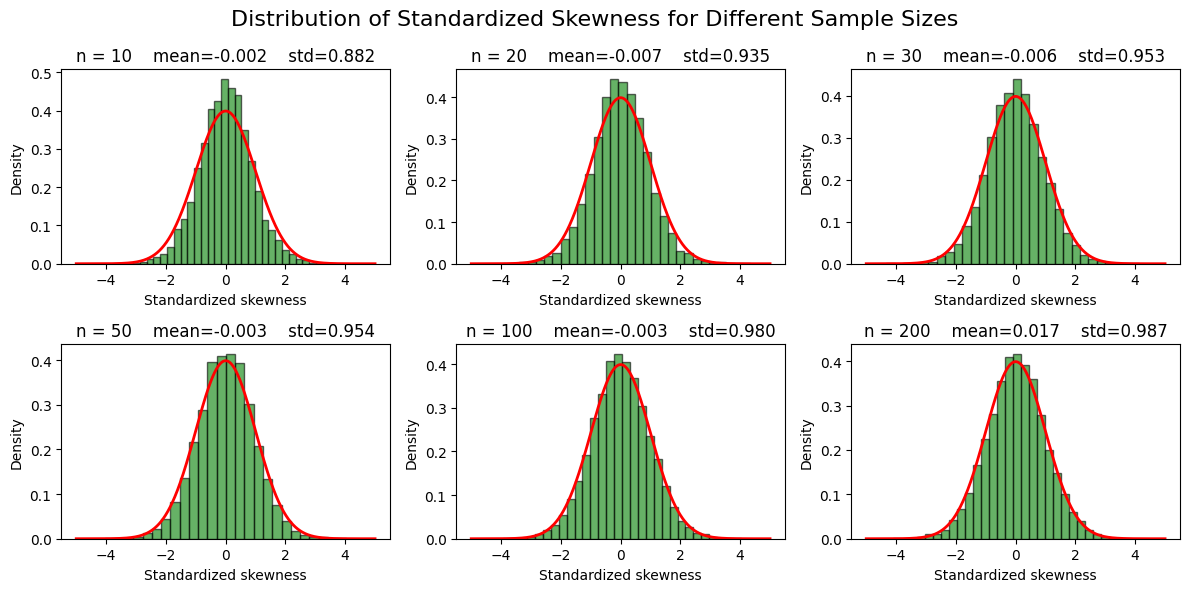

In [15]:
# repeat the experiment for n = 10, 20, 30, 50 and plot results
ns = [10, 20, 30, 50, 100, 200]
N = 10000  # number of repetitions
mu, sigma = 0, 1  # parameters of the normal distribution
xx = np.linspace(-5, 5, 1000)

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
axs = axs.flatten()

for ax, n in zip(axs, ns):
    # generate samples and compute standardized skewness
    X = norm.rvs(loc=mu, scale=sigma, size=(N, n))
    s_vals = np.sqrt(n / 6) * skew(X, axis=1, bias=False)

    # histogram + normal PDF
    ax.hist(s_vals, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')
    ax.plot(xx, norm.pdf(xx), 'r', linewidth=2)

    # annotations
    ax.set_title(f'n = {n}    mean={s_vals.mean():.3f}    std={s_vals.std(ddof=1):.3f}')
    ax.set_xlabel('Standardized skewness')
    ax.set_ylabel('Density')
plt.suptitle('Distribution of Standardized Skewness for Different Sample Sizes', fontsize=16)
plt.tight_layout()
plt.show()

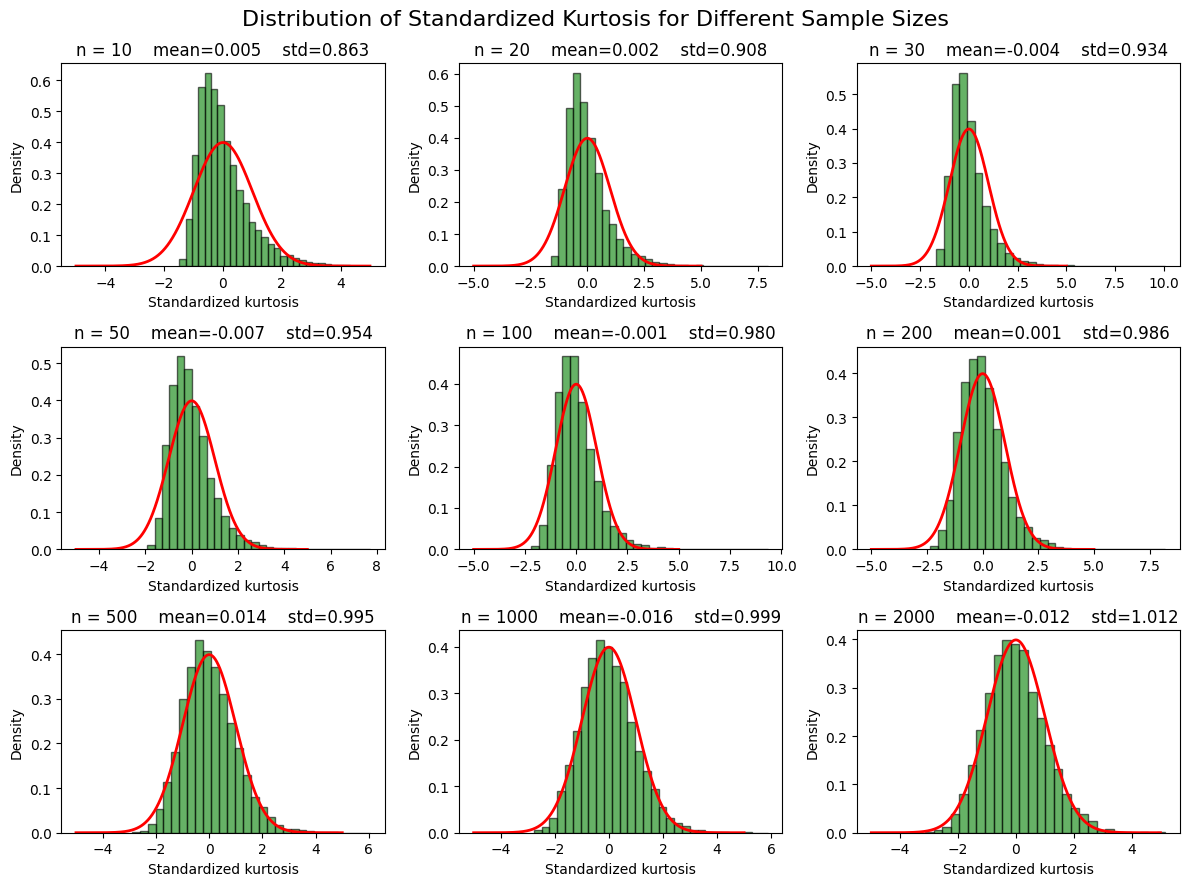

In [18]:
# repeat the experiment for n = 10, 20, 30, 50 and plot results
ns = [10, 20, 30, 50, 100, 200, 500, 1000, 2000]
N = 10000  # number of repetitions
mu, sigma = 0, 1  # parameters of the normal distribution
xx = np.linspace(-5, 5, 1000)

fig, axs = plt.subplots(3, 3, figsize=(12, 9))
axs = axs.flatten()

for ax, n in zip(axs, ns):
    # generate samples and compute standardized kurtosis
    X = norm.rvs(loc=mu, scale=sigma, size=(N, n))
    k_vals = np.sqrt(n / 24) * kurtosis(X, axis=1, bias=False, \
                                        fisher=True)

    # histogram + normal PDF
    ax.hist(k_vals, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')
    ax.plot(xx, norm.pdf(xx), 'r', linewidth=2)

    # annotations
    ax.set_title(f'n = {n}    mean={k_vals.mean():.3f}    std={k_vals.std(ddof=1):.3f}')
    ax.set_xlabel('Standardized kurtosis')
    ax.set_ylabel('Density')

plt.suptitle('Distribution of Standardized Kurtosis for Different Sample Sizes', fontsize=16)
plt.tight_layout()
plt.show()

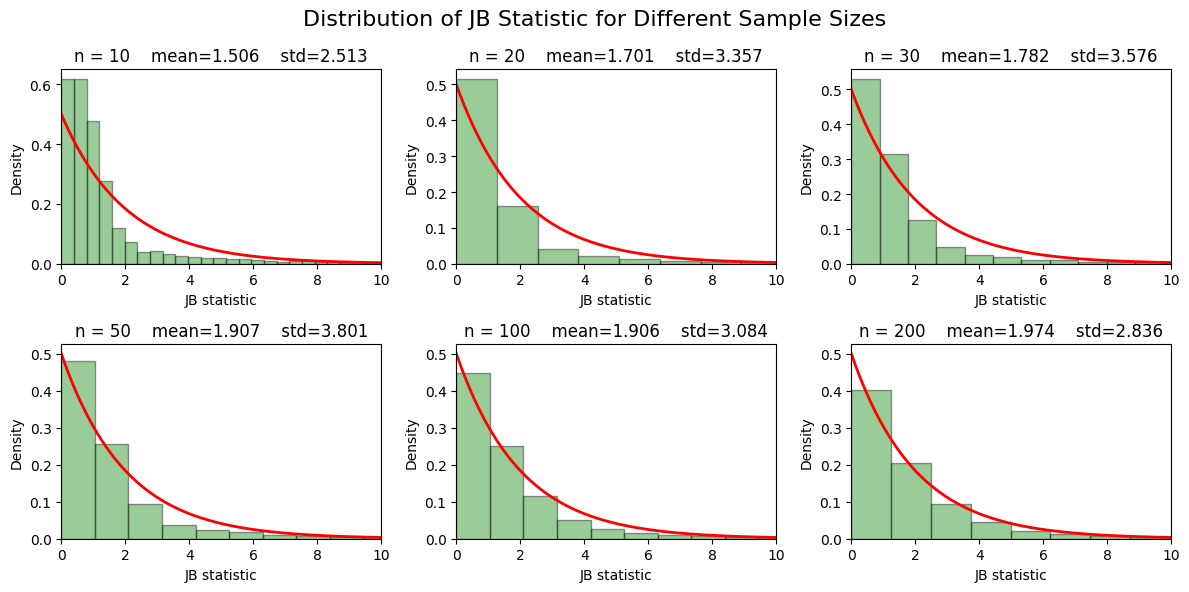

In [23]:
# repeat the experiment for JB=s_skew^2 + k_kurtosis^2
ns = [10, 20, 30, 50, 100, 200]
N = 10000  # number of repetitions
mu, sigma = 0, 1  # parameters of the normal distribution
xx = np.linspace(0, 10, 1000)

fig, axs = plt.subplots(2, 3, figsize=(12, 6))
axs = axs.flatten()

for ax, n in zip(axs, ns):
    # generate samples and compute JB statistic
    X = norm.rvs(loc=mu, scale=sigma, size=(N, n))
    s_vals = np.sqrt(n / 6) * skew(X, axis=1, bias=False)
    k_vals = np.sqrt(n / 24) * kurtosis(X, axis=1, bias=False)
    jb_vals = s_vals**2 + k_vals**2

    # histogram + chi-squared PDF with 2 degrees of freedom
    ax.hist(jb_vals, bins=100, density=True, alpha=0.4, color='g', edgecolor='k')
    ax.plot(xx, chi2.pdf(xx, df=2), 'r', linewidth=2)

    # annotations
    ax.set_title(f'n = {n}    mean={jb_vals.mean():.3f}    std={jb_vals.std(ddof=1):.3f}')
    ax.set_xlabel('JB statistic')
    ax.set_ylabel('Density')
    ax.set_xlim(0, 10)
plt.suptitle('Distribution of JB Statistic for Different Sample Sizes', fontsize=16)
plt.tight_layout()
plt.show()

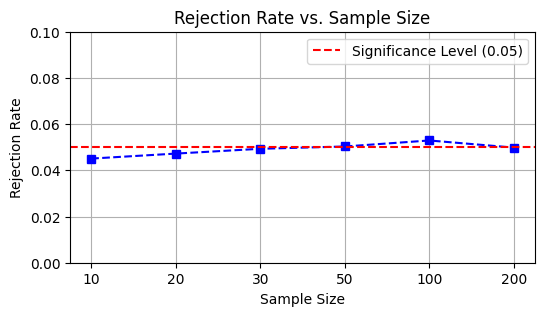

,Rejection Rate
Sample Size,
10,0.04508
20,0.04724
30,0.04932
50,0.05032
100,0.05292
200,0.04984


In [46]:
# Do the experiments for the maintenance of significance level 
ns = [10, 20, 30, 50, 100, 200]
N = 50000  # number of repetitions
mu, sigma = 0, 1  # parameters of the normal distribution
xx = np.linspace(0, 10, 1000)

axs = axs.flatten()
alpha = 0.05
chi2_critical = chi2.ppf(1 - alpha, df=2)
rejection_rates = []
for n in ns:
    # generate samples and compute JB statistic
    X = norm.rvs(loc=mu, scale=sigma, size=(N, n))
    s_vals = np.sqrt(n / 6) * skew(X, axis=1, bias=False)
    k_vals = np.sqrt(n / 24) * kurtosis(X, axis=1, bias=False)
    jb_vals = s_vals**2 + k_vals**2

    # compute rejection rate
    rejection_rate = np.mean(jb_vals > chi2_critical)
    rejection_rates.append(rejection_rate)

# plot rejection rates at different sample sizes at even intervals
plt.figure(figsize=(6, 3))
plt.plot(rejection_rates, 's--', color='blue')
# set x-ticks to sample sizes
plt.xticks(ticks=range(len(ns)), labels=ns)
# draw a horizontal line at alpha
plt.axhline(y=alpha, color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.grid()
plt.ylim(0, 0.1)
plt.xlabel('Sample Size')
plt.ylabel('Rejection Rate')
plt.title('Rejection Rate vs. Sample Size')
plt.show()
# generate a pandas DataFrame to display the results
import pandas as pd
# put the first row of rejection rates in a DataFrame for sample size

df = pd.DataFrame({'Sample Size': ns, 'Rejection Rate': rejection_rates})
# delete the index
df = df.set_index('Sample Size')
# rotate the DataFrame
# df = df.T
df